# Author : Nilanshu Nilay

# Task 6: Prediction using Decision Tree Algorithm

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset using pandas
df= pd.read_csv("H:\Iris (1).csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
#Checking null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Visualising correlation using heatmap

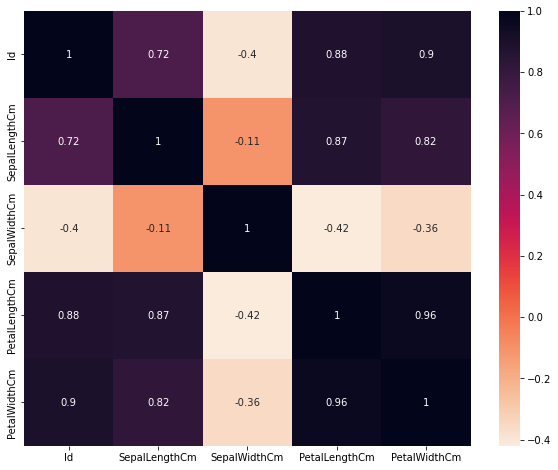

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='rocket_r')
plt.show()

## Data Visualisation

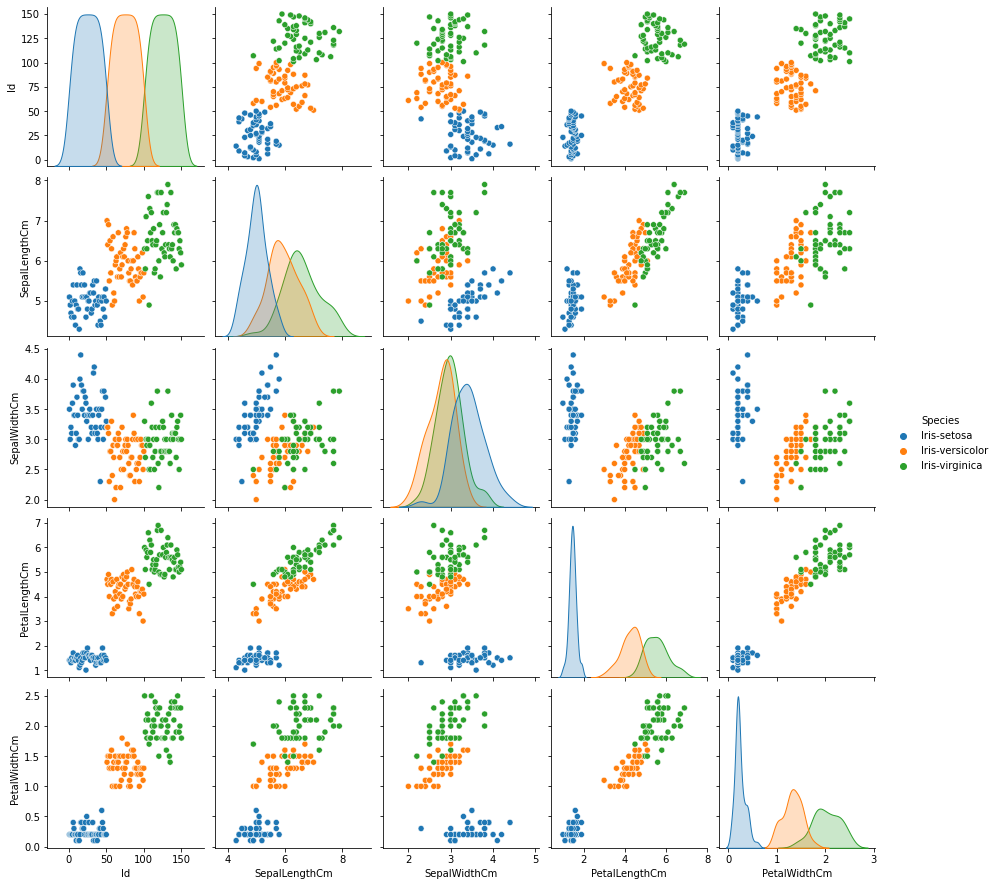

In [10]:
sns.pairplot(df, hue='Species')

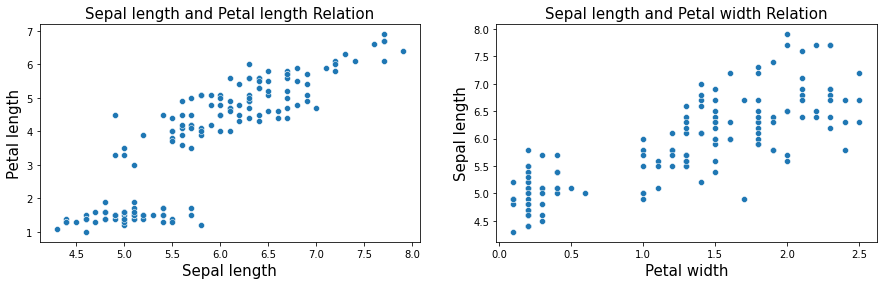

In [11]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.scatterplot(x=df['SepalLengthCm'], y=df['PetalLengthCm'])
plt.xlabel('Sepal length', fontsize=15)
plt.ylabel('Petal length', fontsize=15)
plt.title('Sepal length and Petal length Relation', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x=df['PetalWidthCm'], y=df['SepalLengthCm'])
plt.ylabel('Sepal length', fontsize=15)
plt.xlabel('Petal width', fontsize=15)
plt.title('Sepal length and Petal width Relation', fontsize=15)

plt.show()

In [12]:
#Dropping unnecessary column
df.drop('Id', axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Separating features and target variables

In [13]:
x= df.iloc[:, :4].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
y= df['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

## Decision Tree Model Building

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn import tree
from sklearn import metrics

In [16]:
#Splitting data into train and test
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=0)

In [17]:
#Fitting train and test data and predicting the score
dtc= dt(max_depth= 2, random_state= 0)
dtc.fit(x_train, y_train)
dtc.predict(x_test[0:1])

array(['Iris-virginica'], dtype=object)

In [18]:
dtc_acc= dtc.score(x_test, y_test)
print('Accuracy of our model is: ', dtc_acc)

Accuracy of our model is:  0.9666666666666667


In [19]:
#Classification report
print(metrics.classification_report(y_test, dtc.predict(x_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



## Confusion Matrix

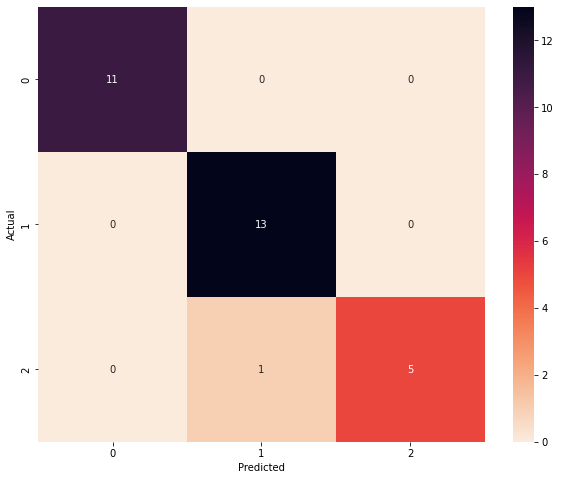

In [20]:
confusion_matrix= metrics.confusion_matrix(y_test, dtc.predict(x_test))
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, cmap='rocket_r')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.show()

In [21]:
accuracy= []
max_depth= list(range(1,6))

for i in max_depth:
    dtc= dt(max_depth= i, random_state= 0)
    dtc.fit(x_train, y_train)
    dtc_acc= dtc.score(x_test, y_test)
    
    accuracy.append(dtc_acc)

## Decision Tree Visualisation

In [22]:
features= df.columns
print(features)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [23]:
classes= df['Species'].unique()
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

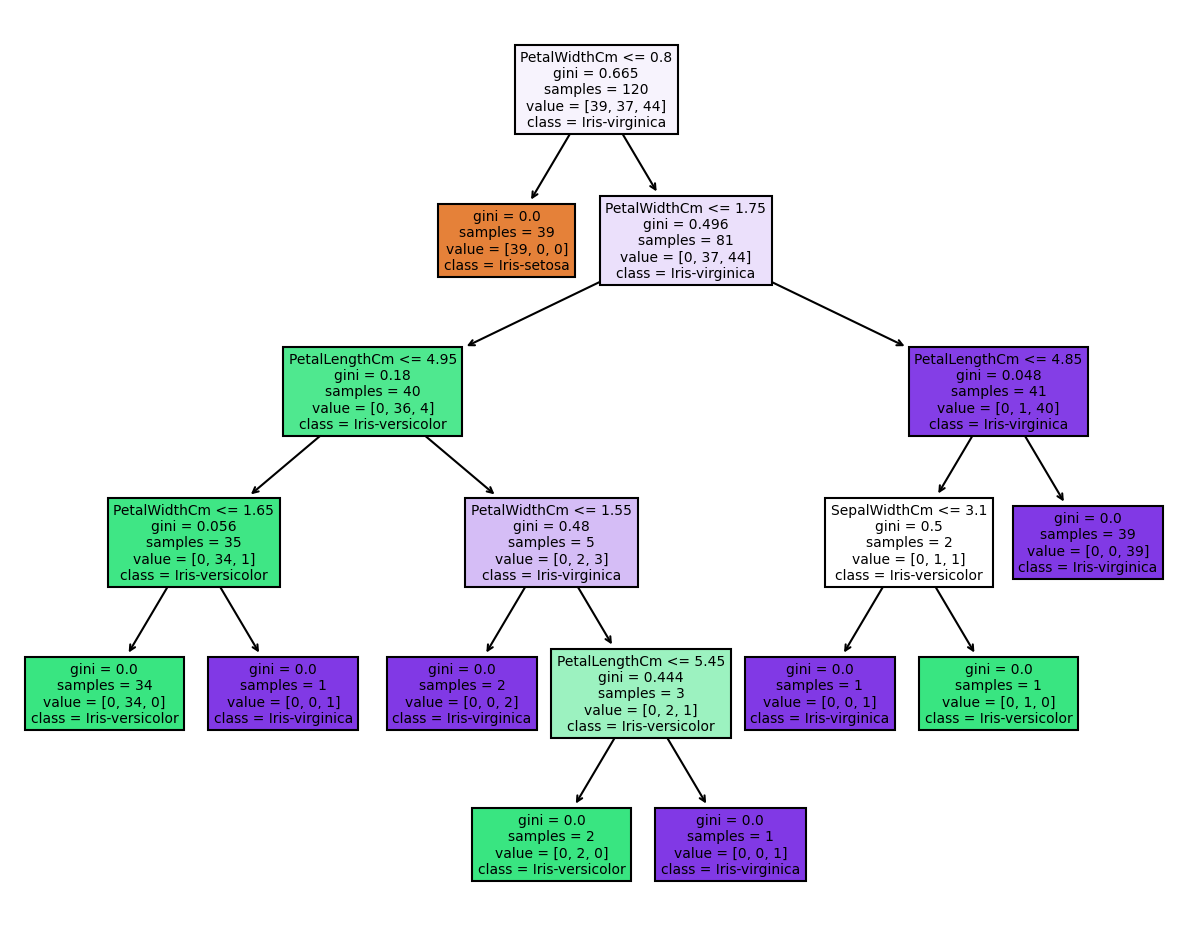

In [24]:
fig, axes= plt.subplots(nrows= 1, ncols= 1, figsize=(10,8), dpi= 150)
tree.plot_tree(dtc, 
              feature_names= features,
              class_names= classes,
              filled= True);